In [6]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community.centrality import girvan_newman
import networkx.algorithms.community as nx_comm
import numpy as np
from scipy.spatial import distance



## Create Graph


In [115]:
def plot(G):
    options = {
        'node_size': 500,
        'width': 2,
        'font_weight': 'bold',
        'font_color': 'white'
    }
    fig, ax = plt.subplots(figsize=(6, 4))
    nx.draw(G, with_labels=True, **options, ax=ax)

    
def create_undirected_graph(edge_list):
    G = nx.Graph()
    G.add_edges_from(edge_list)
    N, E = G.number_of_nodes(), G.number_of_edges()
    
    print('Number of Nodes, ', N)
    print('Number of Edges, ', E)
    print('Avg of Degree, ', 2*E/N)

    plot(G)

    return G

def cal_community(G):
    communities = girvan_newman(G)

    node_groups = []
    for com in next(communities):
        node_groups.append(list(com))

    return node_groups


def cal_adj_matrix(G):
    A = nx.adjacency_matrix(G)
    
    return A.todense()

def cal_page_rank(di_edge_list, alpha=0.85):

    G = nx.DiGraph()
    G.add_edges_from(di_edge_list)

    plot(G)

    rank_scores = nx.pagerank(G, alpha=alpha)

    return rank_scores, np.array(list(s.values()))*G.number_of_nodes()


## 1. Shortest Path

In [43]:

# nx.shortest_path(G, 'a', 'd')


## 2. Clustering coefficient


Number of Nodes,  5
Number of Edges,  7
Avg of Degree,  2.8
{'a': 0.5, 'b': 1.0, 'c': 0.5, 'd': 1.0, 'e': 1.0}


0.8

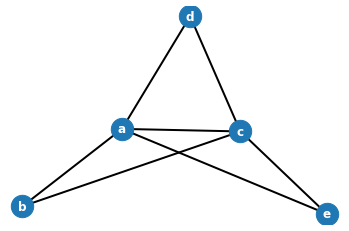

In [44]:
edge_list = [
    ('a', 'b'), 
    ('a', 'c'),
    ('a', 'd'),
    ('a', 'e'),
    
    ('b', 'c'),
    ('c', 'd'),
    ('c', 'e'),
]

G = create_undirected_graph(edge_list)

# nx.clustering(G, 'a')

# Clustering coefficient of all nodes
clust_coefficients = nx.clustering(G)
print(clust_coefficients)

# avg
sum(clust_coefficients.values()) / len(clust_coefficients)
    

## 3. Betweeness

Number of Nodes,  7
Number of Edges,  9
Avg of Degree,  2.5714285714285716


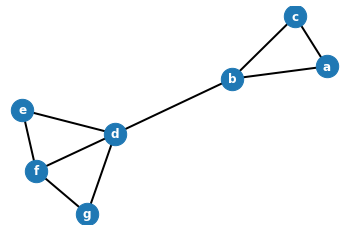

In [45]:
edge_list = [
    ('a', 'b'), 
    ('a', 'c'),
    ('b', 'c'),

    ('b', 'd'),
    ('d', 'e'),
    ('d', 'f'),
    ('d', 'g'),
    ('e', 'f'),
    ('f', 'g')
]

G = create_undirected_graph(edge_list)


In [46]:
nx.edge_betweenness_centrality(G, normalized=False)


{('a', 'b'): 5.0,
 ('a', 'c'): 1.0,
 ('b', 'c'): 5.0,
 ('b', 'd'): 12.0,
 ('d', 'e'): 4.5,
 ('d', 'f'): 4.0,
 ('d', 'g'): 4.5,
 ('e', 'f'): 1.5,
 ('f', 'g'): 1.5}

In [47]:
source = ['d', 'e', 'f', 'g']
target = ['d', 'e', 'f', 'g']

nx.edge_betweenness_centrality_subset(G, source, target, normalized=False)


{('a', 'b'): 0.0,
 ('a', 'c'): 0.0,
 ('b', 'c'): 0.0,
 ('b', 'd'): 0.0,
 ('d', 'e'): 1.5,
 ('d', 'f'): 1.0,
 ('d', 'g'): 1.5,
 ('e', 'f'): 1.5,
 ('f', 'g'): 1.5}

## girvan_newman algorithm

In [48]:

cal_community(G)


[['b', 'c', 'a'], ['d', 'f', 'e', 'g']]

## 4. Modularity

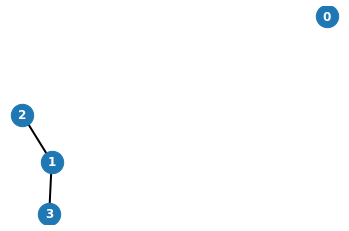

In [49]:

G = nx.empty_graph(n=4, create_using=nx.Graph())

G.add_edges_from([(1, 2), (1, 3)])

plot(G)


In [50]:

nx.modularity_matrix(G)


matrix([[ 0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  , -1.  ,  0.5 ,  0.5 ],
        [ 0.  ,  0.5 , -0.25, -0.25],
        [ 0.  ,  0.5 , -0.25, -0.25]])

In [51]:

nx_comm.modularity(G, [{0, 1}, {2, 3}]), 



(-0.5,)

## 5. Eigen Centrality


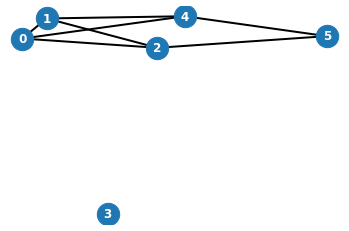

In [64]:
edge_list = [
    (0, 1),(0, 2),(0, 4),
    (1, 2),(1, 4),
    (2, 5),
    (4, 5)
]

G = nx.empty_graph(n=6, create_using=nx.Graph())

G.add_edges_from(edge_list)

plot(G)


In [65]:
cal_adj_matrix(G)


matrix([[0, 1, 1, 0, 1, 0],
        [1, 0, 1, 0, 1, 0],
        [1, 1, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 1],
        [0, 0, 1, 0, 1, 0]])

In [66]:
nx.degree_centrality(G)


{0: 0.6000000000000001,
 1: 0.6000000000000001,
 2: 0.6000000000000001,
 3: 0.0,
 4: 0.6000000000000001,
 5: 0.4}

In [68]:
nx.eigenvector_centrality(G)


{0: 0.49122201059320597,
 1: 0.49122201059320597,
 2: 0.4557987441346209,
 3: 1.6134046192581886e-07,
 4: 0.4557987441346209,
 5: 0.3192129106225423}

### Page Rank(directed graph)


({1: 0.372526246091333,
  2: 0.19582365458881654,
  3: 0.39415009931985023,
  4: 0.037500000000000006},
 array([1.49010498, 0.78329462, 1.5766004 , 0.15      ]))

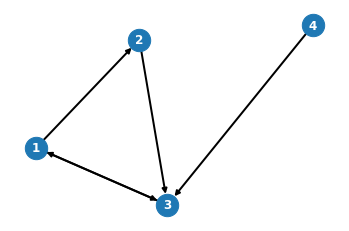

In [117]:

di_edge_list = [
    (1, 2), (1,3),
    (2,3), (3,1),
    (4,3)
]


cal_page_rank(di_edge_list)


# Similarity

In [117]:
## Cosine Distance
def d_cosine(v1, vlist):
    v1 = np.array(v1)
    vlist = np.array(vlist)

    theta = []

    for v in vlist:    
        t = (v1 @ v) / np.linalg.norm(v1) / np.linalg.norm(v)       
        theta.append(t)
    
    return theta


def d_euclidian(v1, vlist):
    v1 = np.array(v1)
    vlist = np.array(vlist)

    theta = []
    for v in vlist: 
        theta.append(np.linalg.norm(v1-v))
    return theta




def d_manhattan(v1, vlist):
    v1 = np.array(v1)
    vlist = np.array(vlist)

    theta = []
    for v in vlist:
        theta.append(np.sum(np.abs(v1-v)))
    return theta
    
    
    
def d_pearson(matrix, idx):
    vlist = np.array(matrix)
    v1 = vlist[idx]

    theta=[]
    for v2 in vlist:
    
        m1 = np.sum(v1) / len(v1[v1 != 0])
        m2 = np.sum(v2) / len(v2[v2 != 0])

        d1 = np.array([v - m1 if v != 0 else v for v in v1 ])
        d2 = np.array([v - m2 if v != 0 else v for v in v2 ])

        s=np.sum(d1*d2) / np.sqrt(np.sum(d1**2) * np.sum(d2**2))
        theta.append(s) 

    return theta


In [118]:
d_cosine(
    [3,8,7,5],
    [
        [10,8,6,6]
    ]
)


[0.8912374332033542]

In [119]:
d_euclidian(
    [1.5, 1.5],
            
    [
        [2, 1]
    ]
)
            

[0.7071067811865476]

In [120]:
d_manhattan(
    [3, 8],
    [
        [10, 8]
    ]
)

[7]

In [121]:
d_pearson([
    [8,2,5,7,1,8],
    [0,0,4,1,7,3],
    [0,5,7,7,4,8],
    [2,7,4,3,6,3],
    [7,5,7,8,5,7]
], 2)


[0.8626056877614031,
 -0.7378647873726218,
 1.0,
 -0.7432422527106193,
 0.8444444444444444]